In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Read and introduce traffic_df 

In [2]:
# Load dataset 
traffic_df = pd.read_csv('../data/Traffic.csv')
traffic_df = pd.DataFrame(traffic_df)

In [3]:
# Count traffic cases
traffic_df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [4]:
# Check for NA values
traffic_df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [5]:
# Check for duplicates
traffic_df.duplicated().sum()

0

In [6]:
traffic_df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [7]:
display(traffic_df)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [8]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [18]:
# Conversion to datetime object

traffic_df['Time'] = pd.to_datetime(traffic_df['Time'], format='%I:%M:%S %p')

# 2. Data analysis 

In [10]:
traffic_analysis_df = traffic_df

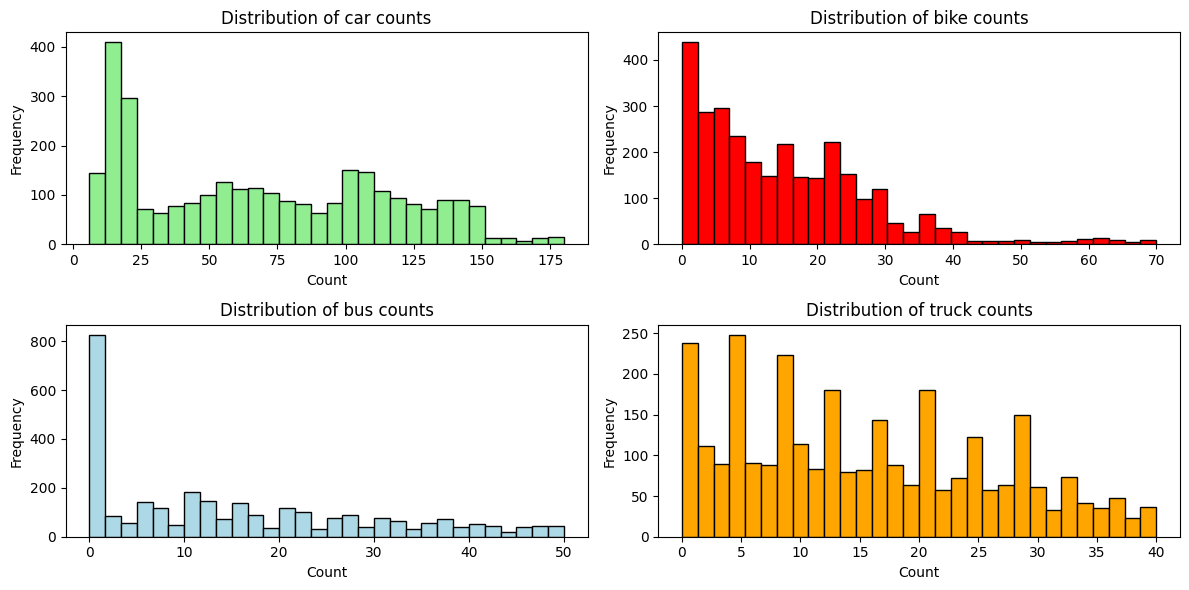

In [11]:
plt.figure(figsize=(12,6))

# Car Count
plt.subplot(2, 2, 1)
plt.hist(traffic_analysis_df['CarCount'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of car counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Bike Count
plt.subplot(2, 2, 2)
plt.hist(traffic_analysis_df['BikeCount'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of bike counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Truck Count
plt.subplot(2, 2, 3)
plt.hist(traffic_analysis_df['BusCount'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of bus counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Bus Count
plt.subplot(2, 2, 4)
plt.hist(traffic_analysis_df['TruckCount'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of truck counts')
plt.xlabel('Count')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

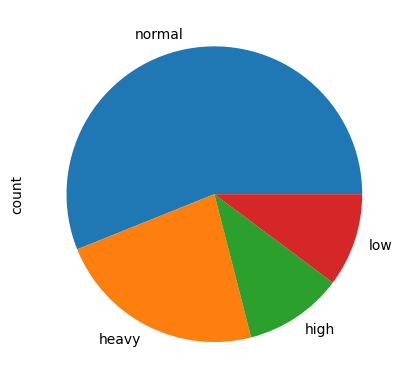

In [12]:
traffic_analysis_df['Traffic Situation'].value_counts().plot(kind='pie')

# 3. Pre-processing

## Pre-emptive manipulation

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], errors='coerce')
traffic_df['DayOfWeek'] = traffic_df['Date'].dt.day_name()
traffic_df['Month'] = traffic_df['Date'].dt.month
traffic_df['Day'] = traffic_df['Date'].dt.day
    
X = traffic_df.drop(columns=['Traffic Situation', 'Date'])
y = traffic_df['Traffic Situation']
    
# Encode categorical features
categorical_features = ['DayOfWeek']
X = pd.get_dummies(X, columns=categorical_features)

# Identify all categorical features
categorical_features = ['Day of the week', 'Time']

# Convert 'Time' to categorical if it's still in string format
if 'Time' in X and X['Time'].dtype == object:
    categorical_features.append('Time')

# Use one-hot encoding
X = pd.get_dummies(X, columns=categorical_features)
    
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


    

## Split 

In [29]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=None, random_state=42)

# 4. Model testing 

Parameters to test:
- Number of nearest neighbours
- Weight function
- Algorithm
- Metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define test parameters
neighbor_range = range(21)
weight_functions = ['uniform', 'distance']
computation_algorithms = ['ball_tree', 'kd_tree', 'brute_force']
metric = ['euclidian', 'cityblock', 'manhattan', 'l1', 'cosine']

